In [9]:
import pandas as pd
data = pd.read_csv(open('iris.csv'))

>From **petal_width** => **petal_length**

In [10]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
input_ = data[['petal_width']]
output_ = data[['petal_length']]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(input_, output_, test_size=0.2)

In [13]:
regression_model = linear_model.LinearRegression()
regression_model = regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_valid)

In [14]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_valid.values)[0].values,
                   'Prediction': pd.DataFrame(y_pred)[0].values})
df.head()

,Actual,Prediction
0,1.3,1.790671
1,1.4,1.790671
2,6.6,5.782305
3,6.4,5.560547
4,5.9,6.225820


In [15]:
m = regression_model.coef_[0]
b = regression_model.intercept_
print("Coefficients= ", m)
print("Intercept= ", b)

Coefficients=  [2.21757438]
Intercept=  [1.1253986]


In [16]:
print("mean squared error= %.2f" % mean_squared_error(output_, regression_model.predict(input_)))
print("variance score= %.2f" % regression_model.score(input_, output_))

mean squared error= 0.23
variance score= 0.93


In [17]:
#check the score of train and valid data
regression_model.score(X_valid, y_valid)

0.8892325577001327

In [18]:
regression_model.score(X_train, y_train)

0.933959725344802

In [19]:
regression_line = [(m*float(x)) + b for x in np.array(input_)]
x_check = [[1.5]]
y_check = regression_model.predict(x_check)
print(y_check)

[[4.45176017]]


/var/folders/hw/3jxkrsm12kd_z63lgq0613vm0000gn/T/ipykernel_44500/3834445324.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  regression_line = [(m*float(x)) + b for x in np.array(input_)]
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


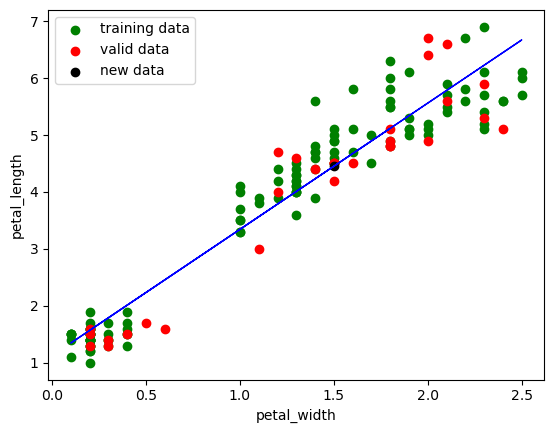

In [20]:
#plot output
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color="green", label="training data")
plt.scatter(X_valid, y_valid, color="red", label="valid data")
plt.scatter(x_check, y_check, color="black", label="new data")
plt.plot(input_, regression_line, color="blue", linewidth=1)

plt.xlabel("petal_width")
plt.ylabel("petal_length")
plt.legend()
plt.show()